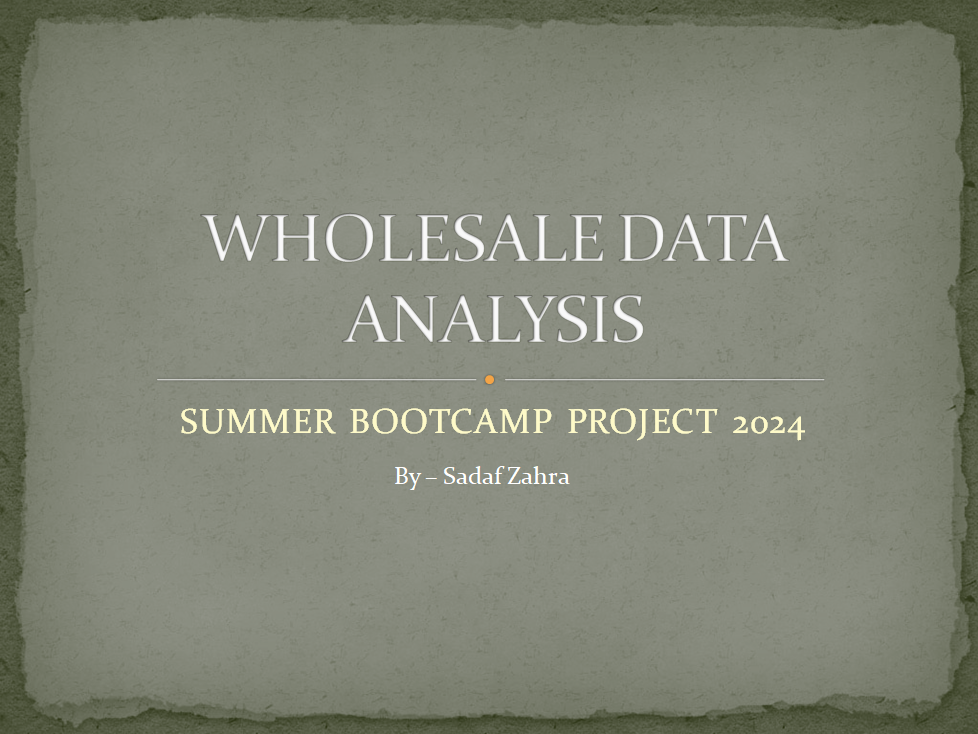

##Index

##List of Tables

##List of Figures

##Problem Statement/ Objective
A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of productsin 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

##Data Description
1.	Buyer/Spender- ID's of customers
2.	Region- Region of the distributor
3.	Fresh- spending on Fresh Vegetables
4.	Milk- spending on milk
5.	Grocery- spending on grocery
6.	Frozen- spending on frozen food
7.	Detergents_paper- spending on detergents and toilet paper
8.	Delicatessen- spending on instant foods


#Basic Steps

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


##Loading the necessary libraries

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [22]:
df=pd.read_csv("/content/drive/MyDrive/4_Wholesale_Customer_New.csv")

1-	Display the top 5 rows.

In [23]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214.0,2674.0,1338.0
1,2,Retail,Other,7057,9810,9568,1762.0,3293.0,1776.0
2,3,Retail,Other,?,8808,7684,2405.0,3516.0,7844.0
3,4,Hotel,Other,13265,1196,4221,6404.0,507.0,1788.0
4,5,Retail,Other,22615,5410,7198,3915.0,1777.0,5185.0


2-	Display the last 5 rows

In [24]:
df.tail()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
435,436,Hotel,Other,29703,12051,16027,13135.0,182.0,2204.0
436,437,Hotel,Other,39228,1431,764,4510.0,93.0,2346.0
437,438,Retail,Other,14531,15488,30243,437.0,14841.0,1867.0
438,439,Hotel,Other,10290,1981,2232,1038.0,168.0,2125.0
439,440,Hotel,Other,2787,1698,2510,65.0,477.0,52.0


3-	Check the shape of dataset.

In [ ]:
df.shape

(440, 9)

4-	Check the datatypes of each feature.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Buyer/Spender     440 non-null    int64  
 1   Channel           437 non-null    object 
 2   Region            434 non-null    object 
 3   Fresh             440 non-null    object 
 4   Milk              440 non-null    int64  
 5   Grocery           440 non-null    int64  
 6   Frozen            437 non-null    float64
 7   Detergents_Paper  439 non-null    float64
 8   Delicatessen      438 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 31.1+ KB


5-	Check the Statistical summary

In [26]:
df.describe()

,Buyer/Spender,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,437.000000,439.000000,438.000000
mean,220.500000,6035.779545,7951.277273,3085.638444,3773.747153,1531.057078
std,127.161315,8964.929649,9503.162829,4867.744145,19364.886053,2825.044262
min,1.000000,1.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,1525.250000,2153.000000,744.000000,256.500000,411.250000
50%,220.500000,3641.000000,4755.500000,1535.000000,813.000000,971.000000
75%,330.250000,7217.500000,10655.750000,3570.000000,3956.000000,1822.750000
max,440.000000,112400.000000,92780.000000,60869.000000,396100.000000,47943.000000


6-	Check the null values

In [ ]:
df.isnull().sum()

Buyer/Spender       0
Channel             3
Region              6
Fresh               0
Milk                0
Grocery             0
Frozen              3
Detergents_Paper    1
Delicatessen        2
dtype: int64

7-	Check the duplicate values

In [ ]:
df.duplicated().sum()

0

8-	Check the anomalies or wrong entries.

In [27]:
(df['Fresh'] == '?').sum()
df[df['Fresh'] == '?']

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
2,3,Retail,Other,?,8808,7684,2405.0,3516.0,7844.0
78,79,Hotel,Other,?,1175,2067,2096.0,301.0,167.0


9-	Check the outliers and their authenticity.

<Axes: >

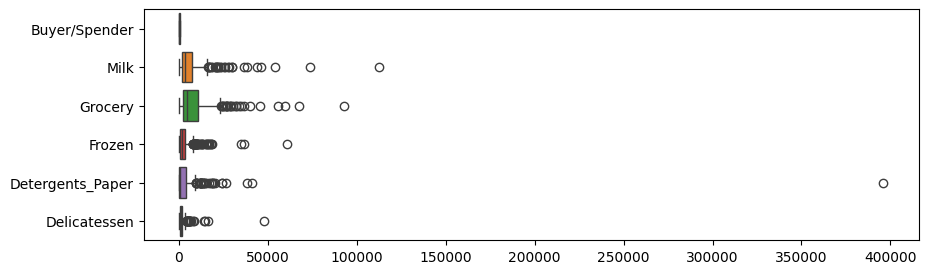

In [ ]:
plt.figure(figsize=(10, 3))
sns.boxplot(data = df, orient = 'h')

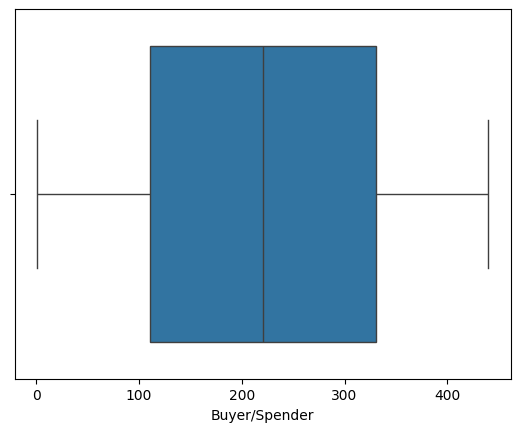

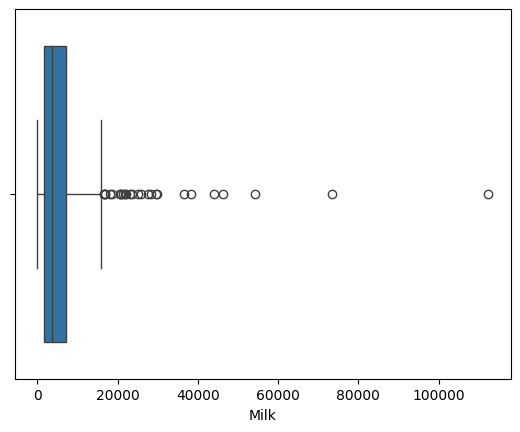

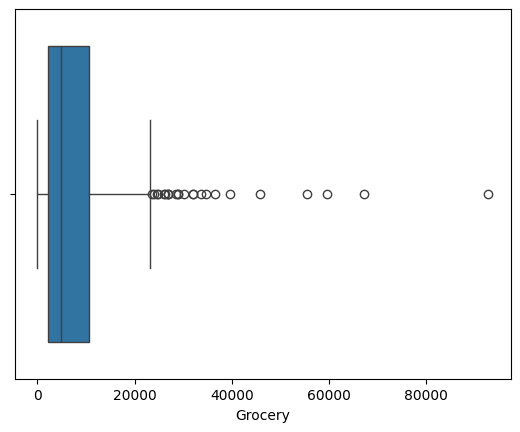

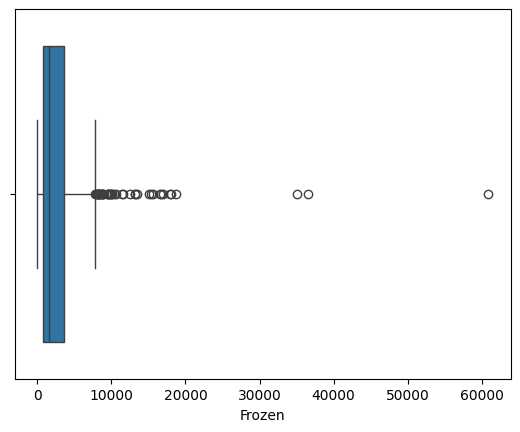

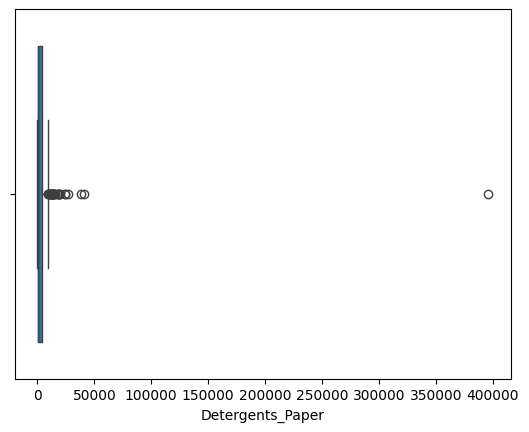

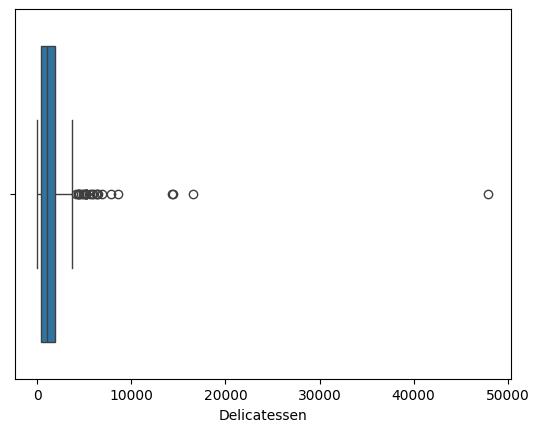

In [ ]:
for i in df.columns:
  if df[i].dtype!='object':
    sns.boxplot(data = df, x = i)
    plt.show()

10-	Do the necessary data cleaning steps like dropping duplicates, unnecessary columns, null value imputation, outliers treatment etc.

In [28]:
#Replacing "?" with null values
df['Fresh'] = df['Fresh'].replace('?',np.nan)
df[df['Fresh']=='?']

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


Observation: Replaced the '?' with null values which are later handled

In [29]:
#Checking the number of null values
df.isnull().sum()

Buyer/Spender       0
Channel             3
Region              6
Fresh               2
Milk                0
Grocery             0
Frozen              3
Detergents_Paper    1
Delicatessen        2
dtype: int64

Observation: Earlier, when we checked the number of null values in the "Fresh" column, it indicated 0, but after replacing the "?" with null values, we check again and it says that there are 2 null values

In [30]:
# List of numeric columns
numeric_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']

# Fill the null values with the median of each column
for column in numeric_columns:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

In [31]:
#Checking again to see if there are null values left
df.isnull().sum()

Buyer/Spender       0
Channel             3
Region              6
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

Observation: All the null values of the numeric columns are filled with the median of that column. 'Channel' and 'Region' are two non numeric columns that have 3 and 6 null values respectively, which will be filled with mode of that column

In [47]:
# List of columns to fill with mode
non_num_col = ['Channel', 'Region']

# Fill missing values in each column with the mode of that column
for column in non_num_col:
    mode_value = df[column].mode()[0]  # Get the first mode value
    df[column].fillna(mode_value, inplace=True)

In [48]:
#Checking again to see if there are null values left
df.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

Observation: All the null values are handled

In [34]:
def remove_outlier(col):
  sorted(col)
  Q1, Q3 = col.quantile([0.25, 0.75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range, upper_range

In [35]:
for i in df.columns:
  if df[i].dtype !='object':
    lr,ur=remove_outlier(df[i])
    df[i]=np.where(df[i]>ur,ur,df[i])
    df[i]=np.where(df[i]<lr,lr,df[i])

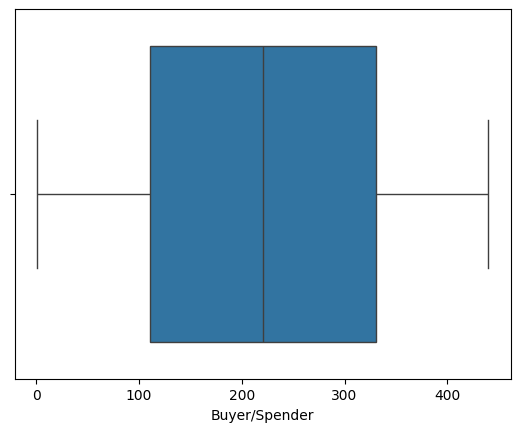

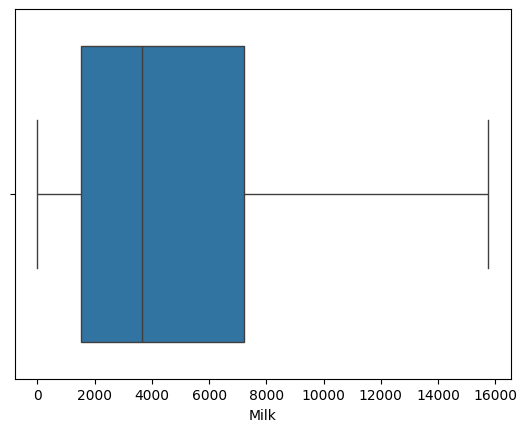

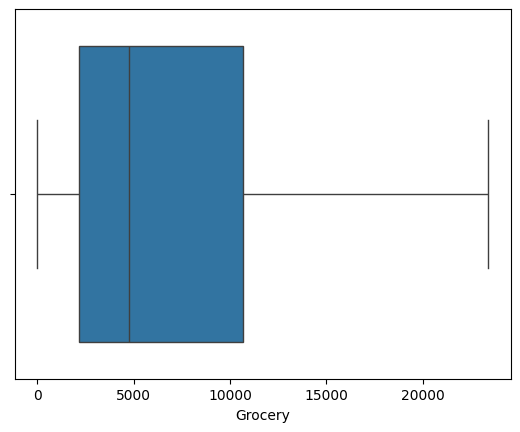

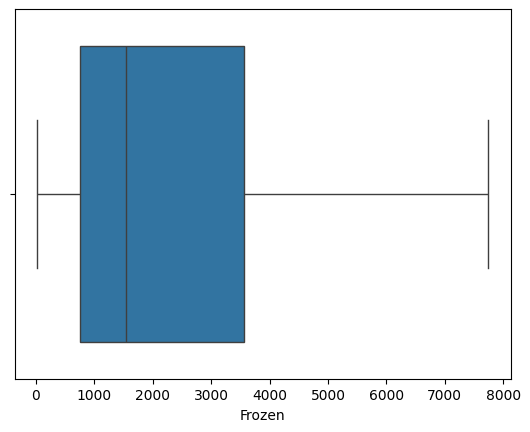

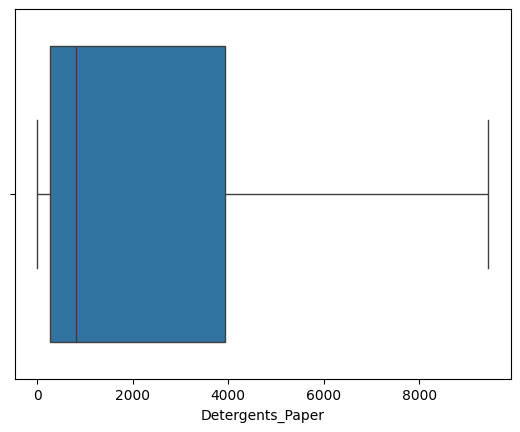

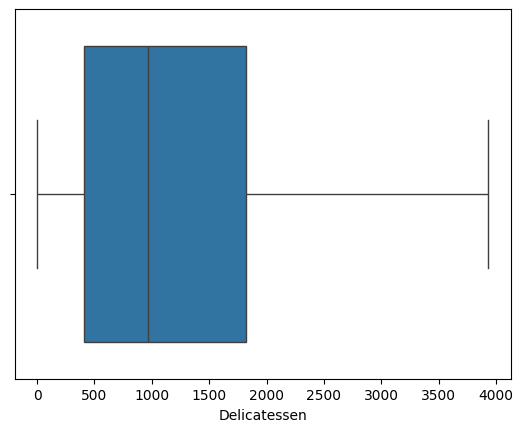

In [36]:
for i in df.columns:
    if df[i].dtype != 'object':
        sns.boxplot(data=df,x=i)
        plt.show()

In [ ]:
#this is just so the next cell can be executed
df['Fresh'] = df['Fresh'].astype('int')

In [ ]:
ll,ul = remove_outlier(df['Fresh'])

#1.	Spending Analysis
* What is the total number of buyers in the dataset?

In [ ]:
total_buyers = df.shape[0]
print("Total number of buyers:", total_buyers)
# df.shape returns a tuple (number_of_rows, number_of_columns).
# df.shape[0] returns the number of rows in the DataFrame.
# df.shape[1] returns the number of columns in the DataFrame.

Total number of buyers: 440


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Buyer/Spender     440 non-null    float64
 1   Channel           440 non-null    object 
 2   Region            440 non-null    object 
 3   Fresh             440 non-null    object 
 4   Milk              440 non-null    float64
 5   Grocery           440 non-null    float64
 6   Frozen            440 non-null    float64
 7   Detergents_Paper  440 non-null    float64
 8   Delicatessen      440 non-null    float64
dtypes: float64(6), object(3)
memory usage: 31.1+ KB


Observation: Since the values in the 'Fresh' column are integer, but it says it's an object here, so we'll change it to int. And I will also change the float values to integer in the columns Frozen, Milk, Grocery, Detergents_Paper, Delicatessen.

In [38]:
#Converting Fresh into integer
df['Buyer/Spender'] = df['Buyer/Spender'].astype('int')
df['Fresh'] = df['Fresh'].astype('int')
df['Frozen'] = df['Frozen'].astype('int')
df['Milk'] = df['Milk'].astype('int')
df['Grocery'] = df['Grocery'].astype('int')
df['Detergents_Paper'] = df['Detergents_Paper'].astype('int')
df['Delicatessen'] = df['Delicatessen'].astype('int')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


* What is the average spending on each category (Fresh, Milk, Grocery, Frozen, Detergents_paper, Delicatessen)?

In [40]:
# Calculate the average spending for each category
average_spending = df[numeric_columns].mean()
print("Average spending on each category:")
print(average_spending)

#I had to change the type of Fresh column from object type to integer
#I also changed the other numeric columns' types from float to integer. Then i got this average

Average spending on each category:
Fresh               12000.045455
Milk                 5073.352273
Grocery              7236.327273
Frozen               2507.361364
Detergents_Paper     2401.163636
Delicatessen         1270.034091
dtype: float64


* Which category has the highest average spending?

In [ ]:
# Find the category with the highest average spending
category = average_spending.idxmax()
max_average_spending = average_spending[category]

print(category)
print(max_average_spending)
print(f"The category with the highest average spending is '{category}' "
      f"with an average spending of {max_average_spending:.2f}.")

Fresh
12000.045454545454
The category with the highest average spending is 'Fresh' with an average spending of 12000.05.


* How many buyers spend above the average on Fresh Vegetables?

In [ ]:
# Count number of buyers spending above the average on Fresh Vegetables
avg_fresh = df['Fresh'].mean()
buyers_above_average = df[df['Fresh'] > avg_fresh].shape[0]
print("Number of buyers spending above the average on Fresh Vegetables:", buyers_above_average)

Number of buyers spending above the average on Fresh Vegetables: 158


###2.	Regional Demand
* What is the total spending in each region?


Total spending in each region for numeric columns:
          Fresh     Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Region                                                                   
Lisbon   845508   397328   534652  222550            577447         98496
Oporto   432343   232764   418529  173172            172339         50668
Other   4002169  2025651  2545381  957307            907702        523381


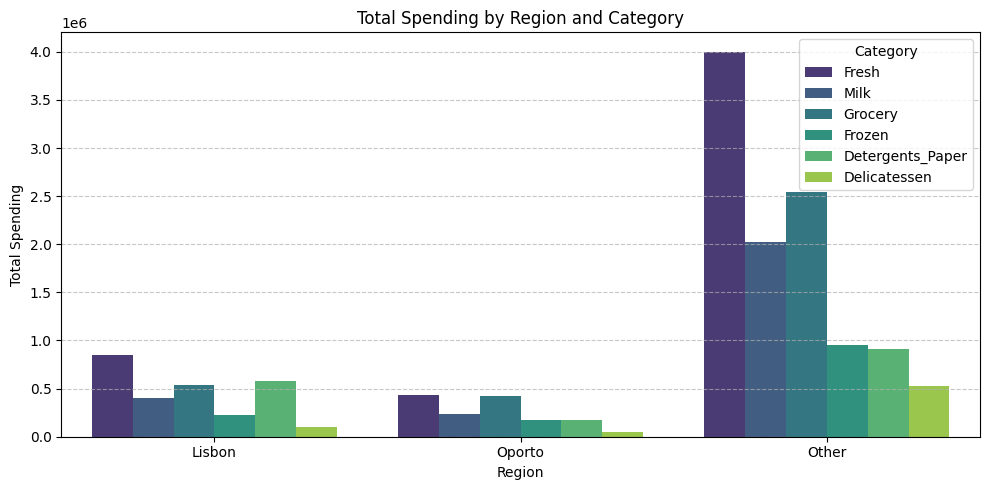

In [ ]:
# Group by 'Region' and sum the spending for numeric columns
total_spending_by_region = df.groupby('Region')[numeric_columns].sum()

print("Total spending in each region for numeric columns:")
print(total_spending_by_region)

total_spending_by_region_reset = total_spending_by_region.reset_index()

# Melt the DataFrame to long format
total_spending_by_region_melted = total_spending_by_region_reset.melt(id_vars='Region', var_name='Category', value_name='Total Spending')

# Plotting using seaborn for grouped bar chart
plt.figure(figsize=(10, 5))
sns.barplot(data=total_spending_by_region_melted, x='Region', y='Total Spending', hue='Category', palette='viridis')
plt.title('Total Spending by Region and Category')
plt.xlabel('Region')
plt.ylabel('Total Spending')
plt.legend(title='Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* Which region has the highest spending on Milk?

The region with the highest spending on Milk is 'Other' with a maximum spending of 112400.00.


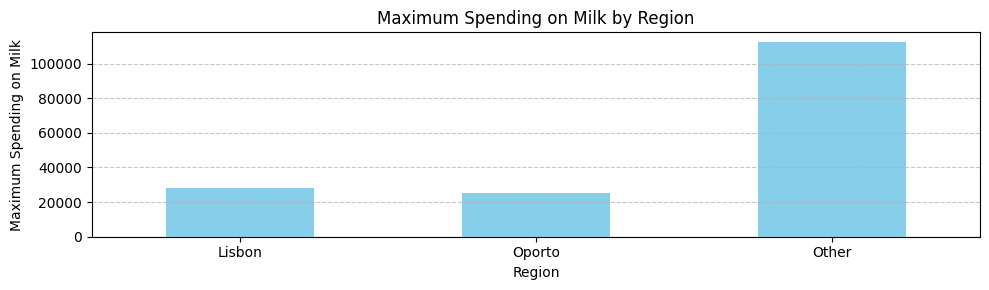

In [ ]:
# Find the maximum spending on Milk in each region
max_spending_on_milk = df.groupby('Region')['Milk'].max()

#print(max_spending_on_milk)


# Identify the region with the highest spending on Milk
region_with_highest_milk_spending = max_spending_on_milk.idxmax()
highest_milk_spending = max_spending_on_milk.max()

print(f"The region with the highest spending on Milk is '{region_with_highest_milk_spending}' "
      f"with a maximum spending of {highest_milk_spending:.2f}.")

# Visualize the maximum spending on Milk in each region using matplotlib
plt.figure(figsize=(10, 3))
max_spending_on_milk.plot(kind='bar', color='skyblue')
plt.title('Maximum Spending on Milk by Region')
plt.xlabel('Region')
plt.ylabel('Maximum Spending on Milk')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* How does the average spending on Grocery vary across different regions?

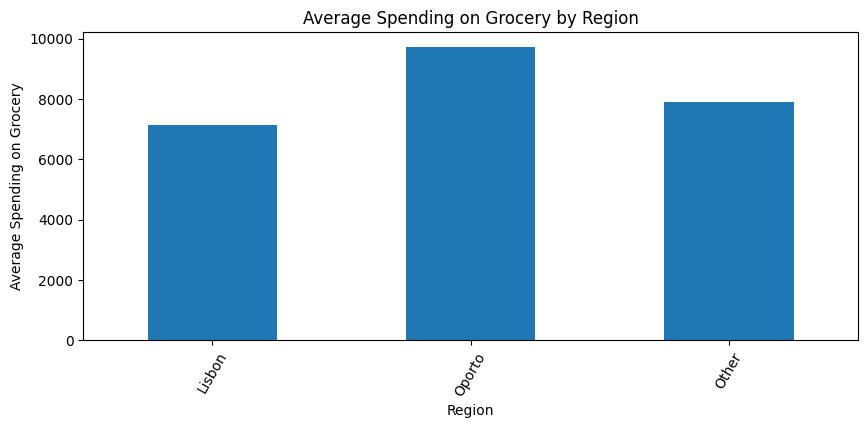

In [ ]:
# Calculate average spending on Grocery by region
average_spending_on_grocery = df.groupby('Region')['Grocery'].mean()

# Plotting using matplotlib
plt.figure(figsize=(10, 4))
average_spending_on_grocery.plot(kind='bar')
#sns.barplot(x='Region', y='Grocery', data=average_spending_on_grocery, palette='viridis')
plt.title('Average Spending on Grocery by Region')
plt.xlabel('Region')
plt.ylabel('Average Spending on Grocery')
plt.xticks(rotation=60)
plt.show()

* Which region has the highest average spending per buyer?

In [ ]:
# Calculate total spending per buyer
df['TotalSpending'] = df[numeric_columns].sum(axis=1)

# Calculate average spending per buyer per region
average_spending_per_buyer = df.groupby('Region')['TotalSpending'].mean()

# Find the region with the highest average spending per buyer
region_with_highest_average_spending = average_spending_per_buyer.idxmax()
highest_average_spending = average_spending_per_buyer.max()

print(f"The region with the highest average spending per buyer is '{region_with_highest_average_spending}' "
      f"with an average spending of ${highest_average_spending:.2f} per buyer.")

The region with the highest average spending per buyer is 'Lisbon' with an average spending of $35679.75 per buyer.


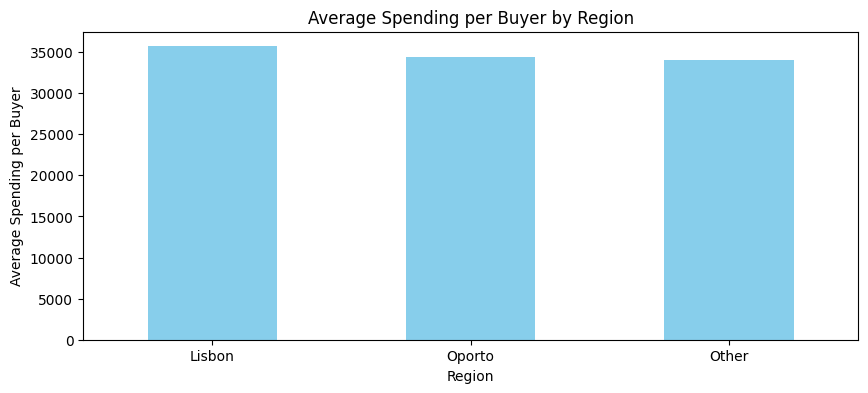

In [ ]:
# Plotting using seaborn
plt.figure(figsize=(10, 4))
#sns.barplot(x='Region', y='TotalSpending', data=average_spending_per_buyer, palette='viridis')
average_spending_per_buyer.plot(kind='bar', color='skyblue')
plt.title('Average Spending per Buyer by Region')
plt.xlabel('Region')
plt.ylabel('Average Spending per Buyer')
plt.xticks(rotation=0)
#plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.tight_layout()
plt.show()

###3.	Category Preferences
* What percentage of buyers spend more on Frozen food compared to Delicatessen?

The percentage of buyers who spend more on Frozen food compared to Delicatessen is 65.0000%.


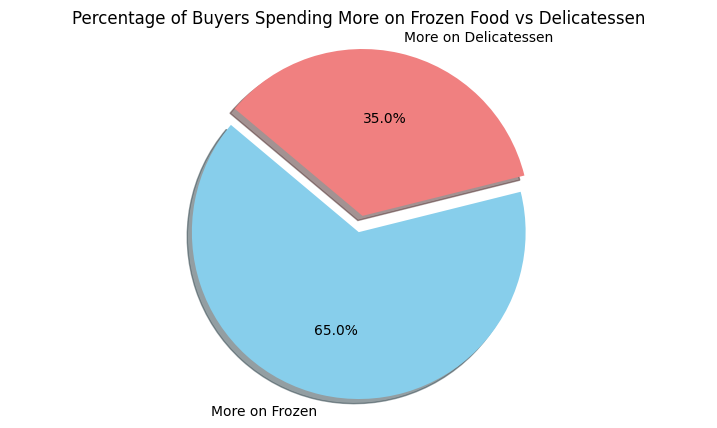

In [ ]:
# Compare spending on Frozen food and Delicatessen(It's a series that stores True every time Frozen has a greater value than Delicatessen)
more_on_frozen = df['Frozen'] > df['Delicatessen']

# Count the number of times 'more_on_frozen' has True in it
num_buyers_more_on_frozen = more_on_frozen.sum()

# Total number of buyers
total_buyers = df.shape[0]

# Calculate the percentage
more_on_frozen_percent = (num_buyers_more_on_frozen / total_buyers) * 100
more_on_delicatessen_percent = 100 - more_on_frozen_percent

# Print the percentage
print(f"The percentage of buyers who spend more on Frozen food compared to Delicatessen is {more_on_frozen_percent:.4f}%.")

# Data for pie chart
labels = ['More on Frozen', 'More on Delicatessen']
sizes = [more_on_frozen_percent, more_on_delicatessen_percent]
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)  # explode the first slice

# Plotting the pie chart
plt.figure(figsize=(9, 5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Percentage of Buyers Spending More on Frozen Food vs Delicatessen')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

* Which category shows the most variation in spending among buyers?

The category with the most variation in spending is 'Fresh' with a standard deviation of 12646.52.


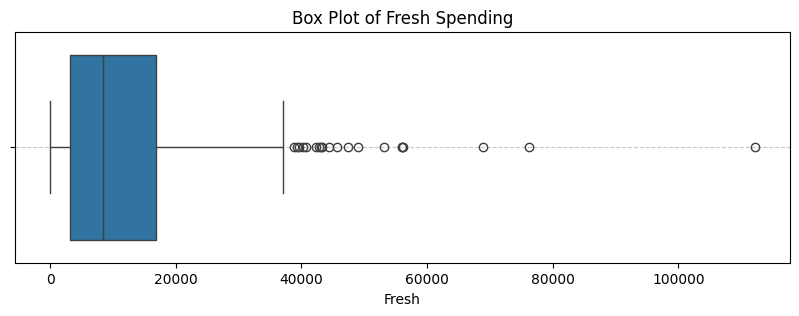

In [ ]:
# Calculate the standard deviation for each numeric column
spending_variation = df[numeric_columns].std()

# Find the category with the highest variation
most_variation_category = spending_variation.idxmax()
most_variation_value = spending_variation.max()

print(f"The category with the most variation in spending is '{most_variation_category}' with a standard deviation of {most_variation_value:.2f}.")

# Plotting the box plot for the category with the most variation
plt.figure(figsize=(10, 3))
sns.boxplot(x=df[most_variation_category])
plt.title(f'Box Plot of {most_variation_category} Spending')
plt.xlabel(most_variation_category)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


* Are there any regions where spending on Detergents_paper is significantly higher than others?

Average spending on Detergents_Paper by Region:
Region
Lisbon    7699.293333
Oporto    4007.883721
Other     2818.950311
Name: Detergents_Paper, dtype: float64


<ipython-input-16-58a9a231722a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_spending_on_detergents.index, y=average_spending_on_detergents.values, palette='viridis')


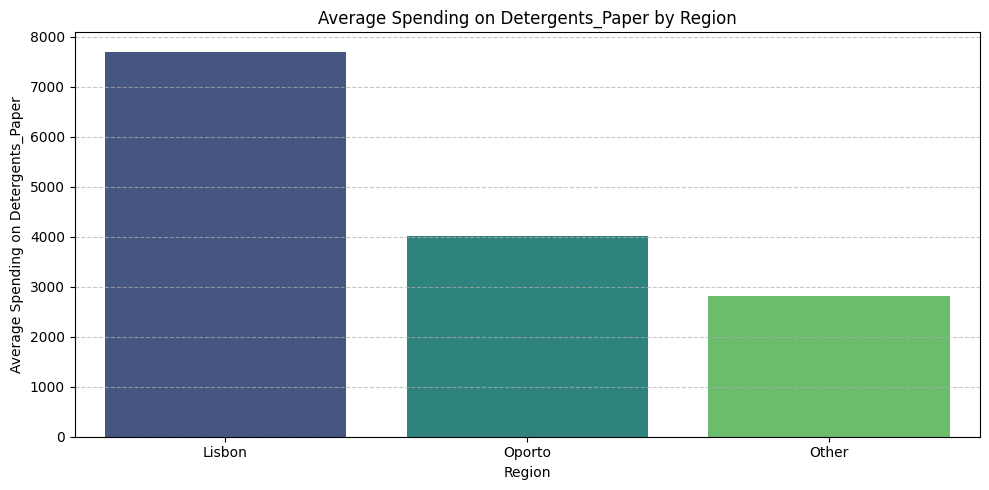

In [ ]:
# Group by 'Region' and calculate the average spending on 'Detergents_Paper'
average_spending_on_detergents = df.groupby('Region')['Detergents_Paper'].mean()

# Print the average spending
print("Average spending on Detergents_Paper by Region:")
print(average_spending_on_detergents)

# Visualization of average spending on Detergents_Paper by region
plt.figure(figsize=(10, 5))
sns.barplot(x=average_spending_on_detergents.index, y=average_spending_on_detergents.values, palette='viridis')
plt.title('Average Spending on Detergents_Paper by Region')
plt.xlabel('Region')
plt.ylabel('Average Spending on Detergents_Paper')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* What is the correlation between spending on Fresh and Frozen food?


The correlation between spending on Fresh and Frozen food is 0.37


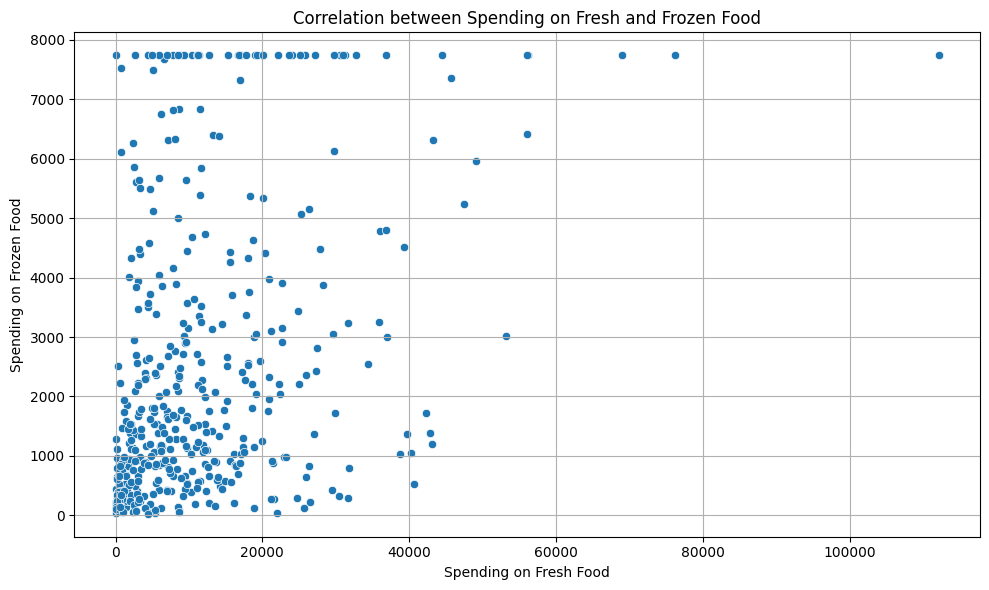

In [ ]:
# Calculate the correlation between 'Fresh' and 'Frozen'
correlation = df['Fresh'].corr(df['Frozen'])

print(f"The correlation between spending on Fresh and Frozen food is {correlation:.2f}")

# Visualization of the correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fresh', y='Frozen', data=df)
plt.title('Correlation between Spending on Fresh and Frozen Food')
plt.xlabel('Spending on Fresh Food')
plt.ylabel('Spending on Frozen Food')
plt.grid(True)
plt.tight_layout()
plt.show()

##4.	Customer Segmentation
* Can buyers be grouped into segments based on their spending patterns? (e.g., using clustering analysis)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

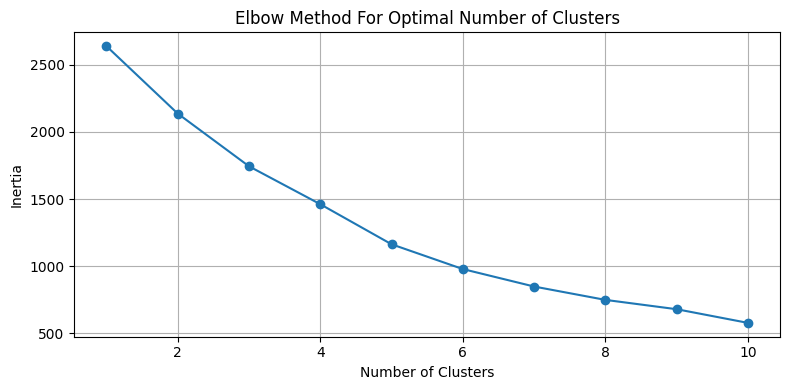

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


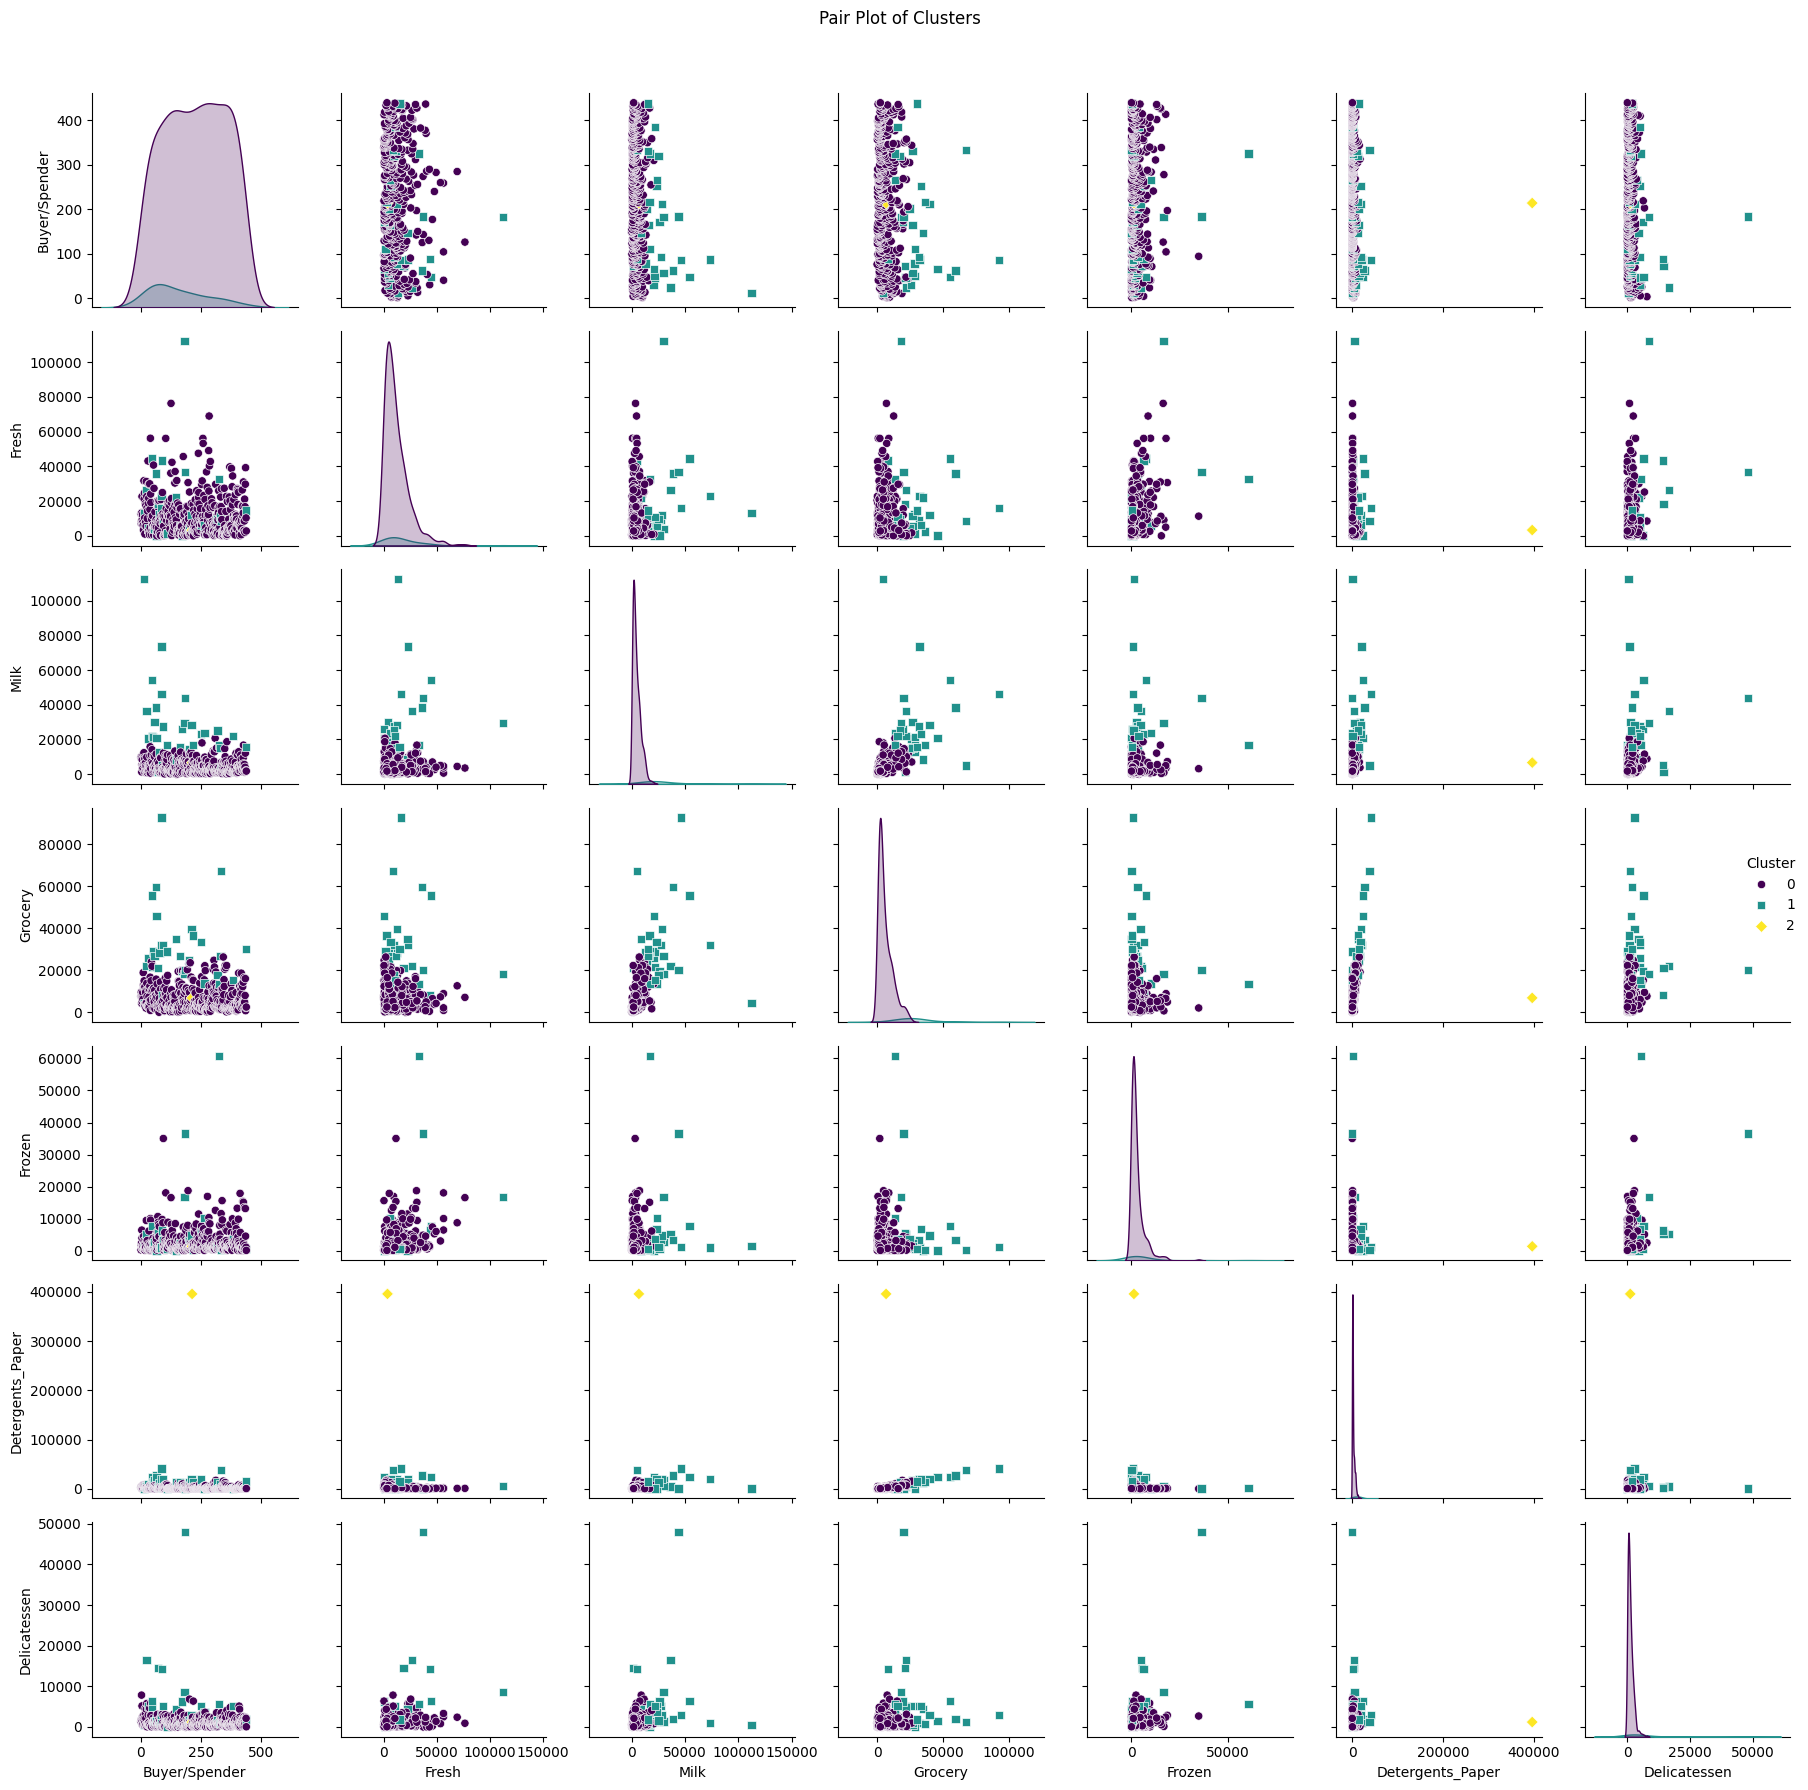

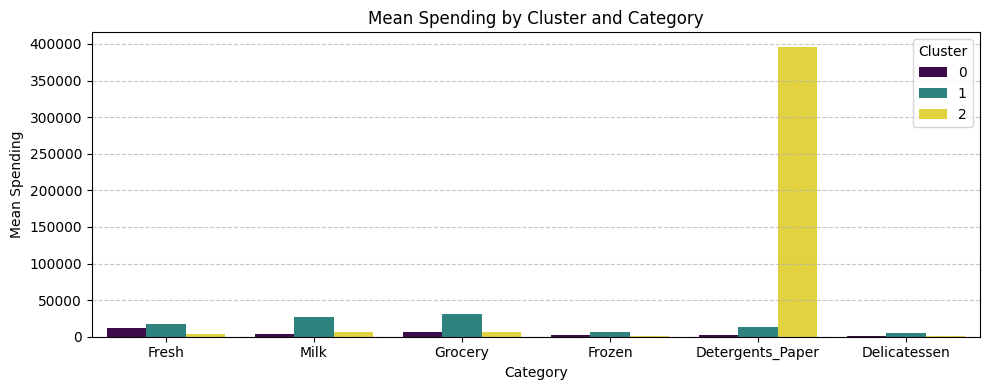

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Extract the features for clustering
X = df[numeric_columns]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow method
inertia = []
range_n_clusters = range(1, 11)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method result
plt.figure(figsize=(8, 4))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()

# Choose the optimal number of clusters (e.g., 3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters using a pair plot
sns.pairplot(df, hue='Cluster', palette='viridis', diag_kind='kde', markers=['o', 's', 'D'])
plt.suptitle('Pair Plot of Clusters', y=1.02)
plt.tight_layout()
plt.show()

# Visualize the clusters using a bar plot of mean spending
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_df = pd.DataFrame(cluster_centers, columns=numeric_columns)
cluster_df['Cluster'] = range(optimal_clusters)

cluster_melted = cluster_df.melt(id_vars='Cluster', var_name='Category', value_name='Mean Spending')

plt.figure(figsize=(10, 4))
sns.barplot(data=cluster_melted, x='Category', y='Mean Spending', hue='Cluster', palette='viridis')
plt.title('Mean Spending by Cluster and Category')
plt.xlabel('Category')
plt.ylabel('Mean Spending')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* What are the characteristics of the top 10% spenders in each category?

<Figure size 1000x500 with 0 Axes>

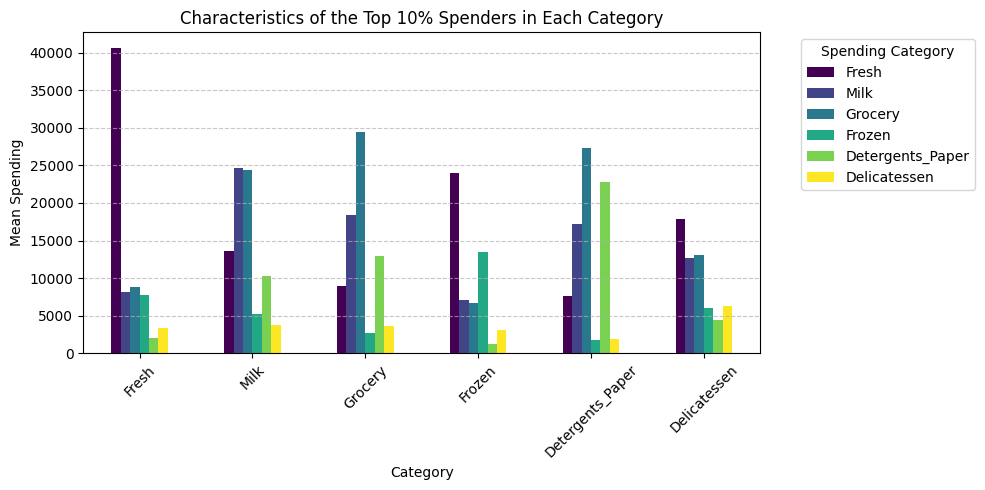

In [ ]:
# Create an empty dictionary to store the top 10% spenders' data
top_spenders = {}

# Identify the top 10% spenders for each category
for category in numeric_columns:
    threshold = df[category].quantile(0.9)
    top_spenders[category] = df[df[category] >= threshold]

# Summarize the characteristics of the top 10% spenders
summary_stats = {category: top_spenders[category][numeric_columns].mean() for category in numeric_columns}
summary_df = pd.DataFrame(summary_stats)

# Transpose the DataFrame for easier plotting
summary_df = summary_df.transpose()

# Plot the characteristics of the top 10% spenders in each category
plt.figure(figsize=(10, 5))
summary_df.plot(kind='bar', figsize=(10, 5), colormap='viridis')
plt.title('Characteristics of the Top 10% Spenders in Each Category')
plt.xlabel('Category')
plt.ylabel('Mean Spending')
plt.xticks(rotation=45)
plt.legend(title='Spending Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

* How do spending patterns differ between high spenders and low spenders?


To check the spending patterns differ between high spenders and low spenders:
* Calculate total spending: Sum the spending across all categories for each customer.
* Categorize spenders: Divide customers into high spenders and low spenders based on the median total spending.
* Calculate average spending: Compute the average spending in each category for both high spenders and low spenders.

In [ ]:
# Calculate the total annual spending for each customer
df['Total_Spending'] = df[numeric_columns].sum(axis=1)

# Categorize customers into high spenders and low spenders based on the median total spending
median_spending = df['Total_Spending'].median()
df['Spender_Category'] = np.where(df['Total_Spending'] >= median_spending, 'High Spender', 'Low Spender')

# Calculate average spending in each category for high spenders and low spenders
average_spending = df.groupby('Spender_Category')[numeric_columns].mean()

# Display the results
print(average_spending)

                         Fresh         Milk       Grocery       Frozen  \
Spender_Category                                                         
High Spender      17176.800000  9434.286364  12309.381818  4026.081818   
Low Spender        6823.290909  2637.272727   3593.172727  2124.050000   

                  Detergents_Paper  Delicatessen  
Spender_Category                                  
High Spender           6533.127273   2223.059091  
Low Spender            1000.909091    833.963636  


##5.	Cross-Category Analysis
* Is there a correlation between spending on Milk and Grocery?

Correlation between spending on Milk and Grocery: 0.5902889029079396


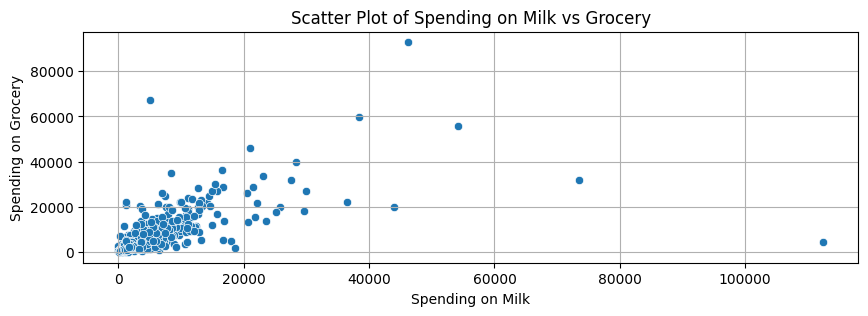

In [ ]:
# Calculate the correlation coefficient between 'Milk' and 'Grocery'
correlation = df['Milk'].corr(df['Grocery'])

# Display the correlation coefficient
print("Correlation between spending on Milk and Grocery:", correlation)

# Create a scatter plot to visualize the correlation between spending on Milk and Grocery
plt.figure(figsize=(10, 3))
sns.scatterplot(x='Milk', y='Grocery', data=df)
plt.title('Scatter Plot of Spending on Milk vs Grocery')
plt.xlabel('Spending on Milk')
plt.ylabel('Spending on Grocery')
plt.grid(True)

# Show the plot
plt.show()

* Do buyers who spend more on Delicatessen also spend more on Frozen food?

Correlation between spending on Delicatessen and Frozen food: 0.3904854847304075


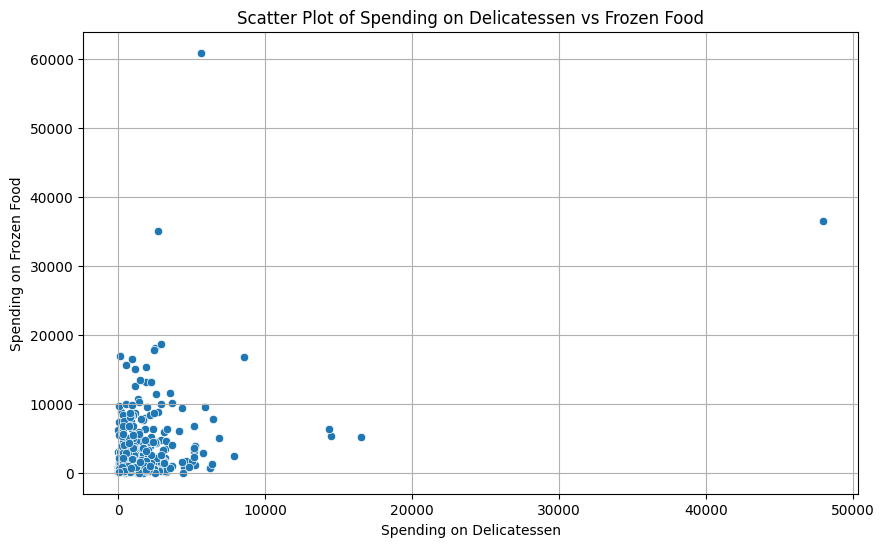

In [ ]:
# Calculate the correlation coefficient between 'Delicatessen' and 'Frozen'
correlation = df['Delicatessen'].corr(df['Frozen'])
print("Correlation between spending on Delicatessen and Frozen food:", correlation)

# Create a scatter plot to visualize the correlation between spending on Delicatessen and Frozen food
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Delicatessen', y='Frozen', data=df)
plt.title('Scatter Plot of Spending on Delicatessen vs Frozen Food')
plt.xlabel('Spending on Delicatessen')
plt.ylabel('Spending on Frozen Food')
plt.grid(True)

# Show the plot
plt.show()

* What is the combined average spending on Fresh and Milk for each region?


In [ ]:
# Create a new column for combined spending on Fresh and Milk
df['Fresh_Milk_Combined'] = df['Fresh'] + df['Milk']

# Calculate the average combined spending on Fresh and Milk for each region
average_combined_spending = df.groupby('Region')['Fresh_Milk_Combined'].mean()

# Display the results
print(average_combined_spending)

Region
Lisbon    16571.146667
Oporto    15467.604651
Other     18719.937888
Name: Fresh_Milk_Combined, dtype: float64


##6.	Demand Trends
* Which region has the fastest growing spending on Fresh Vegetables?

In [41]:
# Group by 'Region' and calculate mean spending on Fresh Vegetables
fresh_spending_by_region = df.groupby('Region')['Fresh'].mean()

# Find the region with the highest average spending on Fresh Vegetables
region_fastest_growth = fresh_spending_by_region.idxmax()

print(f"The region with the fastest growing spending on Fresh Vegetables is: {region_fastest_growth}")

The region with the fastest growing spending on Fresh Vegetables is: Other


This code will calculate the average spending on Fresh Vegetables for each region and identifies which region has the highest average spending, implying faster growth in spending on Fresh Vegetables.

* How does the total spending on Grocery change across regions over time (if time data is available)?

In [43]:
# Check if 'Time' column exists
if 'Time' in df.columns:
    # Group by Region and Time, then sum the Grocery spending
    grocery_spending = df.groupby(['Region', 'Time'])['Grocery'].sum().unstack()

    # Plot the data
    plt.figure(figsize=(10, 4))

    for region in grocery_spending.index:
        plt.plot(grocery_spending.columns, grocery_spending.loc[region], label=region)

    plt.xlabel('Time')
    plt.ylabel('Total Spending on Grocery')
    plt.legend(title='Region')
    plt.title('Total Spending on Grocery by Region Over Time')
    plt.grid(True)
    plt.show()
else:
    print("Time data not available in the provided dataset.")

Time data not available in the provided dataset.


* What is the average spending per buyer in each category over a specified time period (if time data is available)?


In [44]:
if 'Time' in df.columns:

  df['Year'] = pd.to_datetime(df['Time']).dt.year
  df['Month'] = pd.to_datetime(df['Time']).dt.month
  grouped_data = df.groupby(['Year', 'Month', 'Channel'])
  average_spending = grouped_data['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'].mean()

  print(average_spending)
else:
  print("Time data is not available in the provided dataset.")

Time data is not available in the provided dataset.


##7.	Buyer Insights
* What is the repeat purchase rate for buyers who spend above the average in at least three categories?


In [51]:
# Calculate average spending per category (numeric columns only)
average_spending = df[numeric_columns].mean()

# Identify high spenders who spend above average in at least three categories (numeric columns only)
high_spenders = df[df[numeric_columns].gt(average_spending, axis=1).sum(axis=1) >= 3]

# Calculate repeat purchase rate among high spenders (using categorical column like 'Channel')
repeat_purchase_rate = high_spenders['Channel'].value_counts(normalize=True).get('Retail', 0) * 100

print("Repeat purchase rate for high spenders:", repeat_purchase_rate)

Repeat purchase rate for high spenders: 63.934426229508205


* How many buyers spend consistently (i.e., similar amounts) across all categories?

In [52]:
# Calculate standard deviation of spending for each buyer across all categories
std_dev_per_buyer = df[numeric_columns].std(axis=1)

# Define a threshold for consistency
threshold = 1000

# Count how many buyers have standard deviation below the threshold
consistent_buyers_count = (std_dev_per_buyer < threshold).sum()

print(f"Number of buyers spending consistently across all categories: {consistent_buyers_count}")

Number of buyers spending consistently across all categories: 17


* Which region has the most diverse spending patterns (i.e., high variance in spending across categories)?


In [53]:
# Group by 'Region' and calculate variance of spending across categories
variance_per_region = df.groupby('Region')[numeric_columns].var()

# Find the region with the highest variance
region_with_most_diverse_spending = variance_per_region.sum(axis=1).idxmax()

print(f"Region with the most diverse spending patterns: {region_with_most_diverse_spending}")

Region with the most diverse spending patterns: Other
